In [7]:
from inference import FRCNNRecognitionInference, YoloRecognitionInference
from dataset import PlatesDataset
import os
from sklearn.metrics import accuracy_score
## Конфигурация для инференса

InferenceConfig = {
    'detection_model': 'DetectionModels/best.pt',
    'ocr_model': {'lang_list': ['en'], 'recog_network': 'alpr_2', 'user_network_directory': './user_network/',
                              'model_storage_directory': './model/', 'detector': False},
    'device': 'cuda'
    
}
yolo_int = YoloRecognitionInference(inference_config=InferenceConfig)

Fusing layers... 
Model Summary: 290 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs


In [6]:
# Посчитаем метрики

root_path = r"../data"
json_path = r"../data/train.json"
val_size = 0.2
valset = PlatesDataset(root_path=root_path, json_path=json_path,
                       sample_type='val', val_size=val_size)

data_folder = '../data'
img_list = [os.path.join(data_folder, object['file']) for object in valset.img_list if len(object['nums'])==1]

results = yolo_int.predict_img_list(img_list)

100%|██████████| 4907/4907 [05:55<00:00, 13.80it/s]


In [12]:
## Почитаем метрику Accuracy для валидационной выборки
results = [i[0] if len(i) > 0 else "" for i in results ]
true_texts = [object['nums'][0]['text'] for object in valset.img_list if len(object['nums'])==1]
print(f'Accuracy score: {round(100*accuracy_score(true_texts, results), 2)}%')

Accuracy score: 85.33%


Recognized text: ['B486EP35']


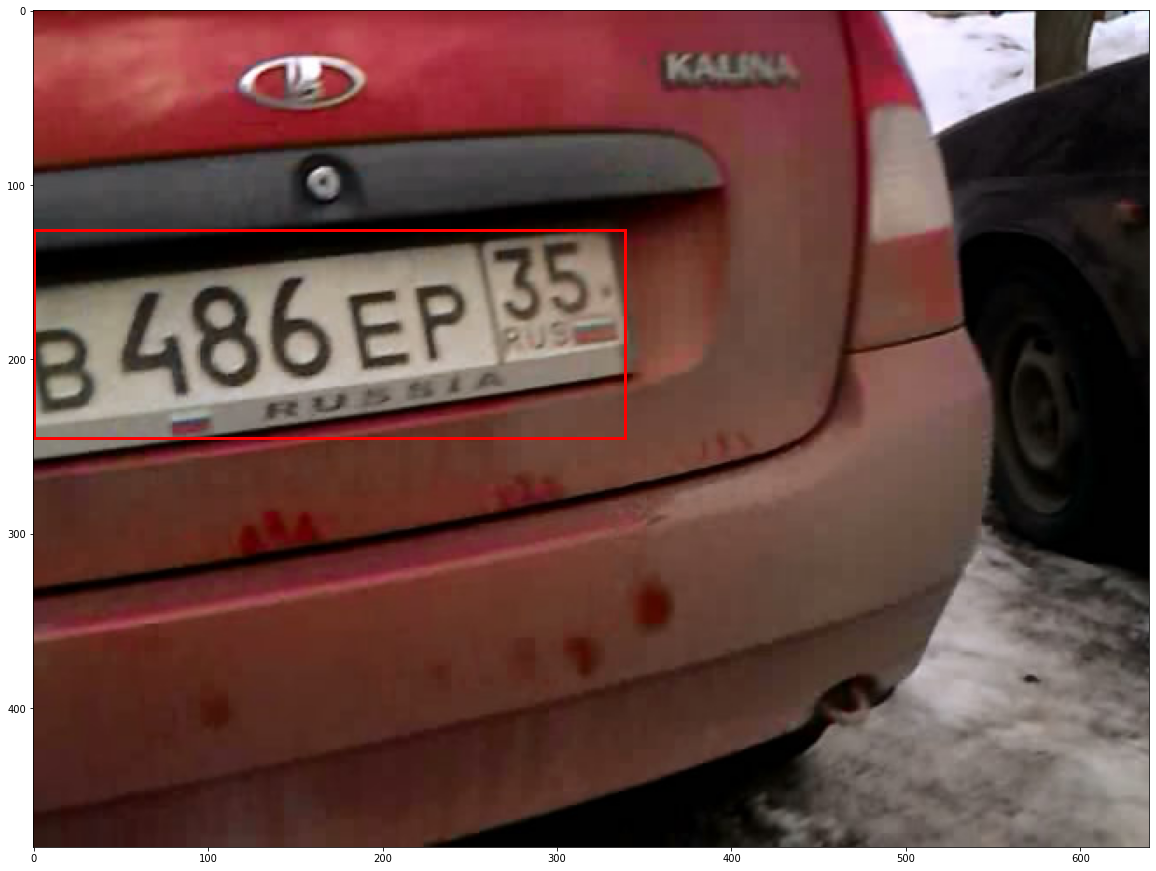

In [13]:
%matplotlib inline 
yolo_int.visualize_image("test_images/711.jpg")

In [ ]:
from inference import FRCNNRecognitionInference

InferenceConfig = {
    'detection_model': 'DetectionModels/faster_rcnn_v5_17.pth',
    'ocr_model': {'lang_list': ['en'], 'recog_network': 'alpr_2', 'user_network_directory': './user_network/',
                              'model_storage_directory': './model/', 'detector': False},
    'device': 'cuda'
    
}

fasterrcnn_int = FRCNNRecognitionInference(inference_config=InferenceConfig)

results_frcnn = fasterrcnn_int.predict_img_list(img_list)

In [ ]:
## Почитаем метрику Accuracy для валидационной выборки
true_texts = [object['nums'][0]['text'] for object in valset.img_list if len(object['nums'])==1]
print(f'Accuracy score: {round(100*accuracy_score(true_texts, results_frcnn), 2)}%')

In [ ]:
%matplotlib inline
fasterrcnn_int.visualize_image("test_images/711.jpg")